# Todo:
* Alter the pipeline, split test train before tiling
* Class imbalance in when fitting.
* Adjust to the fit hyperparams set in the paper: 0.04;0.9
* Calculate AUC, by tiling and basic augmentation for shape.

## Pipeline

In [1]:
import pandas as pd 
import os
import glob
from sklearn.model_selection import train_test_split
from datetime import datetime

# Mac local path
root_path =  r'/Users/krish/ljmu/1.data/afo/'

In [3]:
len(glob.glob(root_path+'images/*.jpg'))

3641

In [4]:
total_images_df = pd.DataFrame(columns = ['file_name','humans','number_of_humans']) # A dataframe that contains all the images


for images_path in glob.glob(root_path+'images/*.jpg'):
    label_path = root_path+ '1category_labels/'+images_path.split('/')[-1].replace('.jpg','.txt')
    
    with open(label_path,'r') as fp:
        number_of_human = int(len(fp.readlines()))
    
    if (number_of_human == 0): 
        total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
    else:
        total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)

total_images_df.to_csv(root_path+'images/all_images.csv')

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':0,'number_of_humans':number_of_human},ignore_index=True)
/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1521468689.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_images_df = total_images_df.append({'file_name':images_path,'humans':1,'numb

In [5]:
train_df, test_df = train_test_split(total_images_df, 
                                   test_size = 0.25, 
                                   random_state = 1998,
                                   stratify = total_images_df['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df.shape[0], 'validation', test_df.shape[0])

train_df.to_csv(root_path+'images/train.csv')
test_df.to_csv(root_path+'images/test.csv')

train 2730 validation 911


### Using the train csv to tile and train 

In [2]:
from pathlib import Path
from PIL import Image
import numpy as np
from shapely.geometry import Polygon, Point

In [3]:
train_df = pd.read_csv(root_path + 'images/train.csv')
test_df = pd.read_csv(root_path + 'images/test.csv')

In [4]:
#Dont run # Long run tume prevents from running by accident

### Not sure what size should I tile to ..... The images are of better quality, so the objects are much smaller in size
# get all image names
#imnames = glob.glob('/Users/krish/ljmu/1.data/afo/images/*.jpg')
#imnames = glob.glob('/content/drive/MyDrive/ljmu/1.data/swimmers_dataset/krish_train/*.jpg')
# specify path for a new tiled dataset
newpath = '/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/'
#newpath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/ts'
falsepath = '/Users/krish/ljmu/1.data/afo/tiledv3/train/false/'
#falsepath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/false'
# python program to check if a path exists
#if path doesn’t exist we create a new path

#creating a new directory called pythondirectory
Path(newpath).mkdir(parents=True, exist_ok=True)
Path(falsepath).mkdir(parents=True, exist_ok=True)

# specify slice width=height
slice_size = 300

# tile all images in a loop

for imname in list(train_df['file_name']):
    im = Image.open(imname)
    imr = np.array(im, dtype=np.uint8)
    height = imr.shape[0]
    width = imr.shape[1]
    labname = imname.split('/')[-1].replace('.jpg', '.txt')
    labels = pd.read_csv(root_path+'1category_labels/'+labname, sep=' ', names=['class', 'x1', 'y1', 'w', 'h'])
    
    # we need to rescale coordinates from 0-1 to real image height and width
    labels[['x1', 'w']] = labels[['x1', 'w']] * width
    labels[['y1', 'h']] = labels[['y1', 'h']] * height
    
    boxes = []
    #print(labels)
    # convert bounding boxes to shapely polygons. We need to invert Y and find polygon vertices from center points
    for row in labels.iterrows():
        x1 = row[1]['x1'] - row[1]['w']/2
        y1 = (height - row[1]['y1']) - row[1]['h']/2
        x2 = row[1]['x1'] + row[1]['w']/2
        y2 = (height - row[1]['y1']) + row[1]['h']/2

        boxes.append((int(row[1]['class']), Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])))
    
    counter = 0
    print('Image:', imname)
    # create tiles and find intersection with bounding boxes for each tile
    for i in range((height // slice_size)):
        for j in range((width // slice_size)):
            x1 = j*slice_size
            y1 = height - (i*slice_size)
            x2 = ((j+1)*slice_size) - 1
            y2 = (height - (i+1)*slice_size) + 1

            pol = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
            imsaved = False
            slice_labels = []

            for box in boxes:
                if pol.intersects(box[1]):
                    inter = pol.intersection(box[1])        
                    
                    if not imsaved:
                        sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
                        sliced_im = Image.fromarray(sliced)
                        filename = imname.split('/')[-1]
                        ##filename = imname
                        slice_path = newpath + filename.replace('.jpg', f'_{i}_{j}.jpg')
                        
                        slice_labels_path = newpath + filename.replace('.jpg', f'_{i}_{j}.txt')
                        
                        print(slice_path)
                        #print('hi')
                        sliced_im.save(slice_path)
                        imsaved = True                    
                    
                    # get the smallest polygon (with sides parallel to the coordinate axes) that contains the intersection
                    new_box = inter.envelope 
                    
                    # get central point for the new bounding box 
                    centre = new_box.centroid
                    
                    # get coordinates of polygon vertices
                    x, y = new_box.exterior.coords.xy
                    
                    # get bounding box width and height normalized to slice size
                    new_width = (max(x) - min(x)) / slice_size
                    new_height = (max(y) - min(y)) / slice_size
                    
                    # we have to normalize central x and invert y for yolo format
                    new_x = (centre.coords.xy[0][0] - x1) / slice_size
                    new_y = (y1 - centre.coords.xy[1][0]) / slice_size
                    
                    counter += 1

                    slice_labels.append([box[0], new_x, new_y, new_width, new_height])
            
            # save txt with labels for the current tile
            if len(slice_labels) > 0:
                slice_df = pd.DataFrame(slice_labels, columns=['class', 'x1', 'y1', 'w', 'h'])
                #print(slice_df)
                slice_df.to_csv(slice_labels_path, sep=' ', index=False, header=False, float_format='%.6f')
            
            # if there are no bounding boxes intersect current tile, save this tile to a separate folder 
            if not imsaved:
                sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
                sliced_im = Image.fromarray(sliced)
                filename = imname.split('/')[-1]
                #filename = imname
                slice_path = falsepath + filename.replace('.jpg', f'_{i}_{j}.jpg')                

                sliced_im.save(slice_path)
                #print('Slice without boxes saved')
                imsaved = True
#     if counter == 100:
#         break

Image: /Users/krish/ljmu/1.data/afo/images/k3_69.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_69_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_69_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_173.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_82.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_82_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_82_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_82_3_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_389.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_389_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_389_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_389_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_389_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_389_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_389_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k1_18.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_18_1_6.jpg
/Users/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1032_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1032_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_409.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_409_4_3.jpg
/Users/krish/ljmu/1.data/afo/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_416_6_10.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_295.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_295_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_139_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_139_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_139_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_139_6_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_139_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_139_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_139_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_113.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_113_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_425.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_425_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_425_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_425_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_425_4_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_242.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_29.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_29_0_0.jpg
/User

Image: /Users/krish/ljmu/1.data/afo/images/r3_374.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_374_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_374_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_374_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_389.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_389_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_38

Image: /Users/krish/ljmu/1.data/afo/images/a_174.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_174_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_174_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_174_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_174_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_174_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_174_2_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_143.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_143_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_143_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_143_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_143_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_143_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_143_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_143_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_143_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts

Image: /Users/krish/ljmu/1.data/afo/images/a_1087.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1087_2_6.jpg
/Users/krish/ljmu/1.data/afo/t

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1120_2_7.jpg
/Users/krish/ljmu/1.d

Image: /Users/krish/ljmu/1.data/afo/images/b1_94.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_5_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_94_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_21_6_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_21_6_11.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_215.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_5_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_215_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiled

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_83_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k1_23.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_23_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_23_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_23_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k

Image: /Users/krish/ljmu/1.data/afo/images/s1_206.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_239.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_239_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/t

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1243_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_12.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_12_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_29.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_29_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_29_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_29_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_29_3

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1045_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1045_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_278.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_156.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1019.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1019_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_370_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_4_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_5_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_6_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_6_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_80_6_3.j

Image: /Users/krish/ljmu/1.data/afo/images/s2_205.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_205_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_205_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_203.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_203_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_179.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_101.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_101_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_101_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_101_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_101_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_110.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_110_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_110_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_110_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_110_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_110_1_4.jpg
/Users

Image: /Users/krish/ljmu/1.data/afo/images/w1_13.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_13_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w

Image: /Users/krish/ljmu/1.data/afo/images/z2_17.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_17_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_17_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_17_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_17_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z2_15.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_15_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_15_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_116.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_116_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_116_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_116_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_116_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_116_6_8.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_88.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_88_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_88_2_3.jpg
/U

Image: /Users/krish/ljmu/1.data/afo/images/r3_417.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_417_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_417_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_417_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_417_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_417_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_366.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_418.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_418_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_418_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_418_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_418_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_418_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_92.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_92_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_92_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_92_0_9.jpg

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_384_6_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_384_6_8.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_401.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_401_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_202.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_202_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_202_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_202_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

Image: /Users/krish/ljmu/1.data/afo/images/w2_109.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_109_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_109_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_109_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_109_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_109_6_10.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_179.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_179_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_179_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_179_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_179_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_356.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_311.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_311_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_311_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_311_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_311_1_6.jpg

Image: /Users/krish/ljmu/1.data/afo/images/s2_38.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_198.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_198_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_198_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_198_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_198_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_198_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_198_4_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/f_118.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_118_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_118_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_118_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_118_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_118_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_118_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_118_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_118_1_

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1030_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1030_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_245.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_245_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_245_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_245_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_245_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_241.jpg
Image: /Users/krish/ljmu/1.data/afo/images/iv_120.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/iv_120_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/iv_120_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_78.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k4_216.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_216_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_216_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_216_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_216_2_7.jpg

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_143_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_143_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_143_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_73.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_73_3_2.jp

Image: /Users/krish/ljmu/1.data/afo/images/r3_397.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_397_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/wv_165.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/wv_165_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/wv_165_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/wv_165_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/wv_165_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_245.jpg
Image: /Users/krish/ljmu/1.data/afo/images/f_

Image: /Users/krish/ljmu/1.data/afo/images/w1_287.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_287_5_6.jpg
/Users/krish/ljmu/1.data/afo/t

Image: /Users/krish/ljmu/1.data/afo/images/c_88.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_88_3_4.jpg
/Use

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1260_6_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1260_6_10.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_422.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_422_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_422_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_422_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_422_5_8.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_53.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_53_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_53_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_53_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_53_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_53_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_53_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k1_61.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_61_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_61_2

Image: /Users/krish/ljmu/1.data/afo/images/s5_381.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_381_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_381_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_385.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_73.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_73_4_4.j

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/av_1381_4_8.jpg
/Users/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1237_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1237_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1202.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1202_2_4.jpg
/Users/krish/ljmu/1.data/afo/

Image: /Users/krish/ljmu/1.data/afo/images/b1_245.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_245_5_9.jpg
/Users/krish/ljmu/1.data/afo/ti

Image: /Users/krish/ljmu/1.data/afo/images/s5_63.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_255.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_255_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_3_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_3_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_3_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_3_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_3_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_21.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_21_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_21_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_21_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_21_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_21_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_21_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_51.jpg
/Users/krish/ljmu/1.

Image: /Users/krish/ljmu/1.data/afo/images/b1_110.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_4_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_4_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_5_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_5_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_5_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_6_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_6_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_110_6_6.jpg
/Users/krish/ljmu/1.data/

Image: /Users/krish/ljmu/1.data/afo/images/b1_144.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_144_5_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_278.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_278_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1264_6_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1264_6_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1264_6_11.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_184.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_184_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_109.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_66.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k4_170.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_170

Image: /Users/krish/ljmu/1.data/afo/images/r3_188.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_188_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_188_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_188_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1027.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1027_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_286_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_286_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_286_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_286_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_260.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_260_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_260_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_260_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_260_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_260_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_41.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_41_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_41_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_369.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_314.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_314_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_314_0_5.jpg


/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1253_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1253_6_8.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_151.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_151_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_75.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_75_2_5.jpg
/User

Image: /Users/krish/ljmu/1.data/afo/images/s5_470.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_470_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_470_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k4_200.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_200_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_200_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_402.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_6_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_402_6_8

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_374_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_374_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_374_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_374_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_302.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_302_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/

Image: /Users/krish/ljmu/1.data/afo/images/r4_78.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_78_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_78_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_78_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_78_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_267.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_267_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_323.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_163.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_48.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_48_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_48_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_48_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_48_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_48_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_48_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_48_3_2.jpg
/Users/krish

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1040_5_5.jpg
/Users/krish/ljmu/1.

Image: /Users/krish/ljmu/1.data/afo/images/k6_231.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_231_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_231_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_231_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_231_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_37.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_375.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_375_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_375_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_375_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_350.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_215.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_215_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_215_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1095.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1095_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1095_0_6.jpg
/Users

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_199_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_199_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_16.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_6_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_16_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts

Image: /Users/krish/ljmu/1.data/afo/images/r3_75.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_75_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_75_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_75_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_25.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_25_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_25_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_25_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_25_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_25_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_25_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_441.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_441_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_441_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_441_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_441_2_4.jpg
/Use

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_98_6_11.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_338.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w2_202.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_202_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_202_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_202_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_202_1_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_142.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_142_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_142_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_259.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1018.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1018_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1018_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1018_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1018_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1018_1_3.jp

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_12_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tr

Image: /Users/krish/ljmu/1.data/afo/images/w1_441.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_441_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_441_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_441_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_441_3_8.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_292.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_292_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_2

Image: /Users/krish/ljmu/1.data/afo/images/s5_378.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_378_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_378_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_102.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_121.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_121_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1146.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1146_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_11

Image: /Users/krish/ljmu/1.data/afo/images/s2_328.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_328_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_328_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_328_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_172.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_433.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_433_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_433_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_433_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_433_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_40.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_40_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_40_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_40_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_40_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_40_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_40_3_4.jp

Image: /Users/krish/ljmu/1.data/afo/images/s5_376.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_376_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_376_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_42.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_63.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_63_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_63_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_63_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_160.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1135.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1135_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1135_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1135_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1135_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1135_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1135_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1135_0_11.jpg
/

Image: /Users/krish/ljmu/1.data/afo/images/s2_370.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_79.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_79_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_79_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_79_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_79_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_300.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_300_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_475.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_475_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_334.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_334_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_334_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_334_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_334_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_334_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_334_1_9.jpg
/Users/kri

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_387_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_387_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_387_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_387_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_96.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_96_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_96_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_96_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_96_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_174.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_174_0_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_171.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_171_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_171_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_171_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_171_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_171_2_0.j

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_261_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_261_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1093.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1093_1_11.jpg
/Users/krish/ljmu/1.data/afo/

Image: /Users/krish/ljmu/1.data/afo/images/a_184.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_184_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_184_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_184_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_184_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_184_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_184_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_184_4_10.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_112.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_112_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_112_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_112_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_112_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_112_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_112_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_112_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_112_

Image: /Users/krish/ljmu/1.data/afo/images/w1_436.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_436_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_436_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_436_6_9.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_9_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_9_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_269.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_269_2_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_363.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_363_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_363_1_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_83.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1091.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1091_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1091_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1091_0_7.jpg
/Users/krish

Image: /Users/krish/ljmu/1.data/afo/images/d_288.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_288_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d

Image: /Users/krish/ljmu/1.data/afo/images/s2_34.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_34_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_52.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_145.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w2_25.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_25_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_25_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_25_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_25_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_25_4_10.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_403.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_403_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_403_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_403_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_403_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_403_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_403_1_5.jpg
/User

Image: /Users/krish/ljmu/1.data/afo/images/b1_269.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_269_4_5.jpg
/Users/krish/ljmu/1.data/afo/ti

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1263_6_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1263_6_11.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_259.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_259_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_259_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_259_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_259_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_236.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_428.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_428_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_428_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_428_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_428_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_428_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_428_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_428_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_42

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_5_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_5_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_385_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_4_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_4_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_105_5_10.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1048.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1048_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1048_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1048_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1048_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1048_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1048_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv

Image: /Users/krish/ljmu/1.data/afo/images/b1_289.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_289_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_289_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_289_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_289_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_289_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_289_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_289_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_289_5_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_243.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w2_31.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_31_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_31_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_31_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_31_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_31_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_330_6_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_69.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_69_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_69_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_69_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_69_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_131.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_330.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_330_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_330_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_330_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_330_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_189.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_189_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_189_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_189_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k1_55.jpg
/Users/kri

Image: /Users/krish/ljmu/1.data/afo/images/a_1196.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1196_2_4.jpg
/Users/krish/ljmu/1.data/afo/

Image: /Users/krish/ljmu/1.data/afo/images/z3_399.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_399_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_59.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_59_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_59_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_59_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_238_6_4.jpg
Image: /Users/krish/ljmu

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_162_5_6.jpg
/Users/krish/ljmu/1.data

Image: /Users/krish/ljmu/1.data/afo/images/s5_469.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_469_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_469_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_100.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z1_45.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_45_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_45_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_45_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_45_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_339.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_164.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_46.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_46_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_46_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_46_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_46_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1035.jpg
/Users/krish/ljmu/1.da

Image: /Users/krish/ljmu/1.data/afo/images/k1_56.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_56_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_56_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_56_2_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k6_184.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_184_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_184_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_184_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_184_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_184_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_184_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_184_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_184_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_443.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_443_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_443_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_

Image: /Users/krish/ljmu/1.data/afo/images/s5_331.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_17.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_17_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_17_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_17_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_17_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/dv_1409.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/dv_1409_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

Image: /Users/krish/ljmu/1.data/afo/images/d_450.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_450_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1248_4_5.jpg
/Users/krish/ljmu/1.dat

Image: /Users/krish/ljmu/1.data/afo/images/k5_39.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_39_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_371.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_371_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_371_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_371_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_371_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_371_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/kb_31

Image: /Users/krish/ljmu/1.data/afo/images/r3_462.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_462_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_462_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_462_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_462_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_462_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_115.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_115_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_432.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_432_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_432_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_432_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_432_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_432_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_432_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_432_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_432_

Image: /Users/krish/ljmu/1.data/afo/images/r3_282.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_282_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_282_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_282_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_282_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_282_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_282_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_282_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_232.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_232_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_232_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_404.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_404_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_150.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_150_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_150_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_150

Image: /Users/krish/ljmu/1.data/afo/images/r3_158.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_158_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_158_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_158_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_158_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_158_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_158_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_188.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_188_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_188_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_188_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_31.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_31_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_31_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_31_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_31_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_3

Image: /Users/krish/ljmu/1.data/afo/images/c_102.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_102_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c

Image: /Users/krish/ljmu/1.data/afo/images/s1_130.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_130_2_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_314.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_314_

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_33_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_33_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_33_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_33_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_331.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_331_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_75_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_75_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_75_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_75_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_75_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_75_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_75_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_75_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_53.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_53_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_53_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_53_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_53_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_53_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_53_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_53_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_315_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tr

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1051_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1051_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_279.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_279_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_279_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_279_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_279_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_279_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1094.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1094_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1094_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1094_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1094_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1094_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1094_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1094_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/

Image: /Users/krish/ljmu/1.data/afo/images/s5_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_445.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_445_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_445_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_445_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_445_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_445_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_445_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_445_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_278.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_149.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_149_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_149_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_149_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_149_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_162.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_162_0_0.jpg
/U

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1258_6_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1258_6_9.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w2_210.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_210_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_210_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_210_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_210_4_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_173.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_173_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_173_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_173_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_173_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_173_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_173_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_173_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_173_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/t

Image: /Users/krish/ljmu/1.data/afo/images/r3_77.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_77_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_77_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_77_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1080.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1080_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/trai

Image: /Users/krish/ljmu/1.data/afo/images/a_1229.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1229_2_7.jpg
/Users/krish/ljmu/1.data/afo

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_4_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_5_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_100_5_11.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_165.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_125.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1

Image: /Users/krish/ljmu/1.data/afo/images/r3_406.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_406_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_406_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_406_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_406_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_65.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_65_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_387.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_387_5_5.

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1181_2_7.jpg
/Users/krish/ljmu/1.d

Image: /Users/krish/ljmu/1.data/afo/images/g_67.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_67_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_67_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1128.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1128_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train

Image: /Users/krish/ljmu/1.data/afo/images/g_186.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_240.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_162.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_163.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_226.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z2_24.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_24_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_24_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_24_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_24_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_446.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_446_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_446_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_299.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_299_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_299_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_299_3_9.jpg
/Users/krish/ljmu/1.data/afo

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_287_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_287_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_287_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_287_6_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_108.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_5_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_5_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_5_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_108_5_4.jpg
/Users/krish/ljmu/1.data/afo/

Image: /Users/krish/ljmu/1.data/afo/images/s2_173.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_173_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_173_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_173.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_173_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_173_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_173_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_161.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_161_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_161_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_161_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_161_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_161_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_161_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_161_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_161_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts

Image: /Users/krish/ljmu/1.data/afo/images/s2_32.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_32_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_32_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_32_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_175.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_5_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_175_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1025_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1025_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_138.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_138_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_138_1_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_10_1_11.jpg

Image: /Users/krish/ljmu/1.data/afo/images/s2_321.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_321_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/j2_45.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_45_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_45_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_45_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_45_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_45_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_45_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_437.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_437_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_437_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_68.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_68_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_68_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_68_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_68_0_4.jpg
/Users/k

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_140_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_383.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_383_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_383_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_62.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_62_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_62_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_62_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_62_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_62_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_62_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_306.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_383.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_382.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_220.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_148.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_148_0_2.jpg
Image: /Users/krish/lj

Image: /Users/krish/ljmu/1.data/afo/images/a_1213.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1213_2_7.jpg
/Users/krish/ljmu/1.data/afo/

Image: /Users/krish/ljmu/1.data/afo/images/s2_81.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_391.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_391_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k8_239.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k8_239_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k8_239_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k4_182.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_182_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_182_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_182_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_5_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_100.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_100_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_100_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_394.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_394_3_1.jpg
/Users/krish/ljmu

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_144_6_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

Image: /Users/krish/ljmu/1.data/afo/images/k1_40.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_40_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_40_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_40_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_40_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_40_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_419.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_419_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_419_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_419_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_419_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_419_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_284.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1075.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1075_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1075_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1075_0_7.j

Image: /Users/krish/ljmu/1.data/afo/images/a_1184.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1184_2_4.jpg
/Users/krish/ljmu/1.data/afo

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k6_232_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_282.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_282_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/

Image: /Users/krish/ljmu/1.data/afo/images/s1_56.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_352.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i2_161.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i2_161_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_251.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_251_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_398.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_398_3_1.jpg

Image: /Users/krish/ljmu/1.data/afo/images/s5_290.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_326.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_326

Image: /Users/krish/ljmu/1.data/afo/images/z2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_4_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_4_2_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_246.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_246_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_241.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_241_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_24

Image: /Users/krish/ljmu/1.data/afo/images/z3_62.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_62_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1134.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1134_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/t

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_343_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_12_2_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1228.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1228_2_6.jpg
/Users/krish/ljmu/1.data/afo/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1047_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1047_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_50.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_50_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_50_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_50_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_50_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_50_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_400.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_400_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_400_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_400_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_400_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_400_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_400_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_400_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/t

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_78_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_78_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_78_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_78_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_78_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_78_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_445.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_445_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_445_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_37.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_37_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_37_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z1_42.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_42_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_42_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_42_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_42_3_4.jpg
/

Image: /Users/krish/ljmu/1.data/afo/images/r3_112.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_112_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_460.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_460_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_460_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_92.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_92_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_92_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_92_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_421.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_421_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_421_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_421_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_421_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_447.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_447_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_447_3_5.jpg
Im

Image: /Users/krish/ljmu/1.data/afo/images/a_1192.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1192_2_4.jpg
/Users/krish/ljmu/1.data/afo/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_434_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_434_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_434_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_434_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_180.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_76.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_76_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_76_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_76_3_0.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_291.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_72.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_72_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_72_1_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_157.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_157_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_157_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_91.jpg
Image: /Users/kr

Image: /Users/krish/ljmu/1.data/afo/images/a_406.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_6_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_6_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_406_6_10.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_307.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_328.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_133.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_218.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_218_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_218_0_4.jpg
/Users/k

Image: /Users/krish/ljmu/1.data/afo/images/k5_27.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_27_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_27_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_27_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_27_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_27_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_27_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_27_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_27_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_299.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_299_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_299_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_299_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_299_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_299_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_299_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b

Image: /Users/krish/ljmu/1.data/afo/images/e_51.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_51_4_5.jpg
/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_4_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1159_5_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_86.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_86_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_86_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_86_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_86_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_86_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/trai

Image: /Users/krish/ljmu/1.data/afo/images/w1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_0_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_0_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_0_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_0_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_0_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k4_190.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_190_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_190_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_401.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_401_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/f_106.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_106_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_106_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_106_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_106_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_106_1_4.jpg
/Users/kr

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1130_3_5.jpg
/Users/krish/ljmu/1.

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_380_6_8.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_153.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_153_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i1_7_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i1_7_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/t

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_152_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_94.jpg
/Users/krish/ljmu/1.data/afo/til

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_94_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_94_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_94_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_94_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w2_223.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_223_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo

Image: /Users/krish/ljmu/1.data/afo/images/k4_215.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_215_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_215_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_215_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_215_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_215_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_215_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_45.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_45_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_45_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_320.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_320_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_320_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_320_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_320_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_320_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_320_0_

Image: /Users/krish/ljmu/1.data/afo/images/s1_195.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_84.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_84_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_84_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_84_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_84_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_16.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_16_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_16_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_16_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_16_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_16_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k4_176.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_176_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_176_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_176_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_176_3_5.jpg
Im

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_192_5_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_381.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_16.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_16_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_16_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_16_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k5_16_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/

Image: /Users/krish/ljmu/1.data/afo/images/g_79.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_79_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_79_0_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_458.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_458_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_458_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_136.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_136_1_6.jpg
/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_65_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_65_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_22.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_361.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1104.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1104_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_114_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_114_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_114_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_114_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_114_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_114_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z3_57.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_57_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_57_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_57_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_36.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_36_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_36_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_36_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_36_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_36_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/t

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_91_6_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_91_6_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_91_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_91_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_91_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k1_65.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_65_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_65_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_65_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_65_2_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_144.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_144_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_144_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_144_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_144_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_144_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_144_

Image: /Users/krish/ljmu/1.data/afo/images/r3_257.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_257_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_257_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_257_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_257_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_96.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_96_3_1.jpg


Image: /Users/krish/ljmu/1.data/afo/images/s5_462.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_462_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_462_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_162.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_162_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_72.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_72_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_4_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1155_5_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_170.jpg
/Users/krish/ljmu/1.data/afo

Image: /Users/krish/ljmu/1.data/afo/images/s5_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_38.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_118.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_118_2_6.jpg
/U

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_6_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_310_6_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_313.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_313_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_313_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_313_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a

Image: /Users/krish/ljmu/1.data/afo/images/r3_442.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_442_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_442_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_442_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_442_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_442_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_290.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_290_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_

Image: /Users/krish/ljmu/1.data/afo/images/a_1041.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1041_2_8.jpg
/Users/krish/ljmu/1.data/afo/

Image: /Users/krish/ljmu/1.data/afo/images/r3_396.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_396_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1171.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1171_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1171_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1171_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1171_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1171_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/

Image: /Users/krish/ljmu/1.data/afo/images/d_286.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_286_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_219_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_219_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_39.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_39_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_39_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_39_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_39_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_39_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_39_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_39_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_205.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_132.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_132_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/i3_132_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_107.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_107_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_40.jpg
Image: 

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1117_3_7.jpg
/Users/krish/ljmu/1.da

Image: /Users/krish/ljmu/1.data/afo/images/d_320.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_320_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d

Image: /Users/krish/ljmu/1.data/afo/images/cv_1503.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_1503_4_4.jpg
/Users/krish/lj

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_229_4_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_212.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_212_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_212_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_212_2_2.jpg
/Users/krish/ljmu/1.data/afo/ti

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_4_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1112_5_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_221.jpg
Image: /Users/krish/ljmu/1.da

Image: /Users/krish/ljmu/1.data/afo/images/a_301.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_301_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1175_3_4.jpg
/Users/krish/ljmu/1

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_119_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_119_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_119_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_119_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_119_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_119_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_123.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_123_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiled

Image: /Users/krish/ljmu/1.data/afo/images/r3_39.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_39_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_5_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_34.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_34_3_6.jpg
/Users/krish/ljm

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_60_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_66.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_66_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_66_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_66_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_66_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_22.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_22_3_4.jpg
/Use

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_5_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_6_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_398_6_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

Image: /Users/krish/ljmu/1.data/afo/images/b1_182.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_182_6_5.jpg
/Users/krish/ljmu/1.data/afo/ti

Image: /Users/krish/ljmu/1.data/afo/images/s2_80.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s2_80_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_421.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_421_3

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_166_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_166_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k4_166_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1143.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1143_1_8.jpg
/Users/krish/ljmu/1.data/afo/

Image: /Users/krish/ljmu/1.data/afo/images/w2_175.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_4_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_175_5_0.jpg
/Users/krish/ljmu/1.data/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_41_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

Image: /Users/krish/ljmu/1.data/afo/images/a_131.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_253.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_344.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_89.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_366.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_366_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_186.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_186_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_186_0_5.jpg
/Users/krish/ljmu

Image: /Users/krish/ljmu/1.data/afo/images/c_114.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_114_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c

Image: /Users/krish/ljmu/1.data/afo/images/d_436.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/d_436_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts

Image: /Users/krish/ljmu/1.data/afo/images/s1_179.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_179_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_179_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_179_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_264.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_264_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_264_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_264_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_264_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_264_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_264_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z2_16.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_16_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_16_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_16_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_16_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_28.j

Image: /Users/krish/ljmu/1.data/afo/images/k8_246.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k8_246_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k8_246_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k8_246_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k8_246_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_76.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_76_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_76_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_76_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_476.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_476_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_476_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_356.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_90.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_90_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_90_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_90_3_6.jpg
Image:

Image: /Users/krish/ljmu/1.data/afo/images/a_362.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_362_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_24_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_24_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_24_6_11.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_192.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_63.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_63_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_63_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z1_35.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_35_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_35_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z1_35_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_335.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_335_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_335_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_335_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_335_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_335_0_7.jpg
/Users/krish

Image: /Users/krish/ljmu/1.data/afo/images/s5_87.jpg
Image: /Users/krish/ljmu/1.data/afo/images/c_117.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_117_2_

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_42_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_42_5_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_42_5_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_42_6_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_42_6_10.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_89.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_89_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_89_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r4_89_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_405.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_405_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_405_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_405_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_405_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/j2_37.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_37_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_37_1_

Image: /Users/krish/ljmu/1.data/afo/images/s2_104.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_317.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_317_3

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/cv_590_3_5.jpg
/Users/krish/ljmu/

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_134_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_134_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_134_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z2_25.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_25_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z2_25_2_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_368.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1081.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1081_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1081_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1081_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1081_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1081_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1081_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1081_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1081_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_10

Image: /Users/krish/ljmu/1.data/afo/images/s1_263.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s1_263_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_163.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_163_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_163_0_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_106.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_106_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_106_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_106_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_106_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k3_106_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/j2_52.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_52_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_52_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_52_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/j2_52_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_60.jpg
/Users/

Image: /Users/krish/ljmu/1.data/afo/images/f_103.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/f_103_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/

Image: /Users/krish/ljmu/1.data/afo/images/w2_54.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w2_54_1_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_238.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_61.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_61_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_61_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_61_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_61_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_61_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_61_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_61_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_61_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1063.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1063_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1063_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1063_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1063_0_8.jpg
/U

Image: /Users/krish/ljmu/1.data/afo/images/s5_68.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_21.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_0_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_0_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_0_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_0_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_0_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_411.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_411_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_411_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_411_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_411_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_444.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_444_3_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_49.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_49_2_4.jpg
/Users/krish/ljmu/1.dat

Image: /Users/krish/ljmu/1.data/afo/images/r3_464.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_464_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_464_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_464_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_464_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_464_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_394.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_4_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/w1_394_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/t

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_70_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_70_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_70_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_70_5_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_70_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/c_70_5_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z3_52.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_52_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_52_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_52_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_52_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/z3_52_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_244.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_244_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_244_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_244_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_244_2_4

Image: /Users/krish/ljmu/1.data/afo/images/b1_47.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_47_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b

Image: /Users/krish/ljmu/1.data/afo/images/k7_537.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k7_537_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_460.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_460_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_460_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_460_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_460_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_460_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1254.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1254_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1254_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1254_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1254_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1254_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1254_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1254_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/t

Image: /Users/krish/ljmu/1.data/afo/images/a_1255.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1255_2_10.jpg
/Users/krish/ljmu/1.data/afo

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1083_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1083_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1083_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1083_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1083_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1083_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/a_1083_3_8.jpg
Image: /Users/krish/ljmu/1.data/afo/images/kb_32.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/kb_32_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/kb_32_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_449.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_449_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_449_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_449_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_449_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_449_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tra

Image: /Users/krish/ljmu/1.data/afo/images/r3_450.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_450_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_450_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_450_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_450_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_450_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_450_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_450_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_157.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_226.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_226_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_226_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_226_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r3_226_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_287.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_26.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_418.jpg
/Users/

Image: /Users/krish/ljmu/1.data/afo/images/b1_119.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_4_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_4_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_6_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_6_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_6_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_6_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/b1_119_6_8.jpg
/Users/krish/ljmu/1.data/afo

Image: /Users/krish/ljmu/1.data/afo/images/s2_243.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_183.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/s5_183_0_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_56.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_56_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/g_56_1_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k1_37.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_37_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_37_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_37_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_37_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/k1_37_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_48.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_48_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_48_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_48_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/r2_48_4_5.jpg
/Users/krish/lj

/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/wv_92_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/wv_92_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/wv_92_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/wv_92_4_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_26.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_5_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/e_26_5_2.jp

## Model fitting

**Without tiling**

In [5]:
result_root = r'/Users/krish/ljmu/3.results/29112022-new_pipeline-resnet50-300X300/'
Path(result_root).mkdir(parents=True, exist_ok=True)

In [6]:
from tensorflow.keras import layers
from keras_preprocessing.image import ImageDataGenerator

In [7]:
actual_train = pd.read_csv(root_path+'images/train.csv')

In [8]:
actual_train['humans'] = actual_train.humans.apply(lambda x: str(x))

In [9]:
import tensorflow as tf

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

**using tiling data**

In [10]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv3/train/false/*.jpg')
df_false.humans = 0

tiled_train = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_34373/2656981801.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_train = df_true.append(df_false)


In [11]:
tiled_train['humans'] = tiled_train.humans.apply(lambda x: str(x))

In [12]:
tiled_train

,file_name,humans
0,/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/...,1
1,/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/...,1
2,/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/...,1
3,/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/...,1
4,/Users/krish/ljmu/1.data/afo/tiledv3/train/ts/...,1
...,...,...
118420,/Users/krish/ljmu/1.data/afo/tiledv3/train/fal...,0
118421,/Users/krish/ljmu/1.data/afo/tiledv3/train/fal...,0
118422,/Users/krish/ljmu/1.data/afo/tiledv3/train/fal...,0
118423,/Users/krish/ljmu/1.data/afo/tiledv3/train/fal...,0


In [13]:
train_df, valid_df = train_test_split(tiled_train, 
                                   test_size = 0.15, 
                                   random_state = 1998,
                                   stratify = tiled_train['humans']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 121245 validation 21397


In [14]:
# Rotation_range - random rotation within the angle mentioned
# Random_shifts - shifts 20% at max. to the horizontal and vertical(reduce to 10% as already diverse data)
# Random_flip - random flips 
# fill_mode - fill the blank pixels, when augmenting with the nearest color
datagen = ImageDataGenerator(rotation_range = 360,
                             width_shift_range=0.1, height_shift_range=0.1,
                             #horizontal_flip=True, vertical_flip=True, # Isnt much useful for us
                             brightness_range=[0.5,1.5],
                             rescale=1./255.,fill_mode='nearest')

train_generator = datagen.flow_from_dataframe(dataframe=train_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)
valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, x_col = 'file_name', y_col = 'humans', class_mode='binary', target_size=(224 , 224), batch_size=24)

Found 121245 validated image filenames belonging to 2 classes.
Found 21397 validated image filenames belonging to 2 classes.


In [15]:
# Why I have this as false : https://stackoverflow.com/questions/46036522/defining-model2-in-keras-include-top-true
# So that I can list out the number of classes that I have

vgg_16 = tf.keras.applications.resnet50.ResNet50(input_shape=(224 , 224, 3),
                                           include_top=False, 
                                           weights='imagenet')

model2 = Sequential()
model2.add(vgg_16)
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())
model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))

model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))

model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))



model2.add(Dense(1, activation="sigmoid" , name="classification"))

Metal device set to: Apple M1


2022-11-29 03:46:16.914474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-29 03:46:16.914749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.004,momentum=0.9), 
            loss='BinaryCrossentropy',
            metrics = ['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                        

In [17]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta = 0.5)

In [18]:
class_weight = {0:train_df['humans'].value_counts()[0]/train_df.shape[0],1:train_df['humans'].value_counts()[1]/train_df.shape[0],}

In [19]:
history2 = model2.fit(train_generator, validation_data = valid_generator, epochs = 10, class_weight=class_weight,callbacks=[es])

Epoch 1/10


2022-11-29 03:46:18.365798: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-29 03:46:19.600662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5052/5052 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.9341

2022-11-29 05:12:10.977241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5052/5052 [==============================] - 5466s 1s/step - loss: 0.0463 - accuracy: 0.9341 - val_loss: 0.1780 - val_accuracy: 0.9475
Epoch 2/10
5052/5052 [==============================] - 5434s 1s/step - loss: 0.0366 - accuracy: 0.9515 - val_loss: 0.1518 - val_accuracy: 0.9543
Epoch 3/10
5052/5052 [==============================] - 5364s 1s/step - loss: 0.0341 - accuracy: 0.9543 - val_loss: 0.1494 - val_accuracy: 0.9549
Epoch 4/10
5052/5052 [==============================] - 5371s 1s/step - loss: 0.0323 - accuracy: 0.9560 - val_loss: 0.1449 - val_accuracy: 0.9576


In [20]:
now = datetime.now()
date_time = now.strftime("%d%m%Y-%H%M")
model_save_dir = result_root+date_time+'-ResNet+tile+augmentation_10epochs_afo_300X300'
model2.save(model_save_dir)

INFO:tensorflow:Assets written to: /Users/krish/ljmu/3.results/29112022-new_pipeline-resnet50-300X300/29112022-0946-ResNet+tile+augmentation_10epochs_afo_300X300/assets


INFO:tensorflow:Assets written to: /Users/krish/ljmu/3.results/29112022-new_pipeline-resnet50-300X300/29112022-0946-ResNet+tile+augmentation_10epochs_afo_300X300/assets


**I am not sure how I got 75 auc score for model 1. The paper got only 40ish. maybe is it because of any augmentation at all** 
#### Model3 without any augmentation

## Metrics


In [21]:
# Test data prep
#Dont run # Long run tume prevents from running by accident

### Not sure what size should I tile to ..... The images are of better quality, so the objects are much smaller in size
# get all image names
#imnames = glob.glob('/Users/krish/ljmu/1.data/afo/images/*.jpg')
#imnames = glob.glob('/content/drive/MyDrive/ljmu/1.data/swimmers_dataset/krish_train/*.jpg')
# specify path for a new tiled dataset
newpath = '/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/'
#newpath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/ts'
falsepath = '/Users/krish/ljmu/1.data/afo/tiledv3/test/false/'
#falsepath = '/content/drive/MyDrive/ljmu/1.data/sampletiled/false'
# python program to check if a path exists
#if path doesn’t exist we create a new path

#creating a new directory called pythondirectory
Path(newpath).mkdir(parents=True, exist_ok=True)
Path(falsepath).mkdir(parents=True, exist_ok=True)

# specify slice width=height
slice_size = 300

# tile all images in a loop
test_df = pd.read_csv(root_path+'images/test.csv')
for imname in list(test_df['file_name']):
    im = Image.open(imname)
    imr = np.array(im, dtype=np.uint8)
    height = imr.shape[0]
    width = imr.shape[1]
    labname = imname.split('/')[-1].replace('.jpg', '.txt')
    labels = pd.read_csv(root_path+'1category_labels/'+labname, sep=' ', names=['class', 'x1', 'y1', 'w', 'h'])
    
    # we need to rescale coordinates from 0-1 to real image height and width
    labels[['x1', 'w']] = labels[['x1', 'w']] * width
    labels[['y1', 'h']] = labels[['y1', 'h']] * height
    
    boxes = []
    #print(labels)
    # convert bounding boxes to shapely polygons. We need to invert Y and find polygon vertices from center points
    for row in labels.iterrows():
        x1 = row[1]['x1'] - row[1]['w']/2
        y1 = (height - row[1]['y1']) - row[1]['h']/2
        x2 = row[1]['x1'] + row[1]['w']/2
        y2 = (height - row[1]['y1']) + row[1]['h']/2

        boxes.append((int(row[1]['class']), Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])))
    
    counter = 0
    print('Image:', imname)
    # create tiles and find intersection with bounding boxes for each tile
    for i in range((height // slice_size)):
        for j in range((width // slice_size)):
            x1 = j*slice_size
            y1 = height - (i*slice_size)
            x2 = ((j+1)*slice_size) - 1
            y2 = (height - (i+1)*slice_size) + 1

            pol = Polygon([(x1, y1), (x2, y1), (x2, y2), (x1, y2)])
            imsaved = False
            slice_labels = []

            for box in boxes:
                if pol.intersects(box[1]):
                    inter = pol.intersection(box[1])        
                    
                    if not imsaved:
                        sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
                        sliced_im = Image.fromarray(sliced)
                        filename = imname.split('/')[-1]
                        ##filename = imname
                        slice_path = newpath + filename.replace('.jpg', f'_{i}_{j}.jpg')
                        
                        slice_labels_path = newpath + filename.replace('.jpg', f'_{i}_{j}.txt')
                        
                        print(slice_path)
                        #print('hi')
                        sliced_im.save(slice_path)
                        imsaved = True                    
                    
                    # get the smallest polygon (with sides parallel to the coordinate axes) that contains the intersection
                    new_box = inter.envelope 
                    
                    # get central point for the new bounding box 
                    centre = new_box.centroid
                    
                    # get coordinates of polygon vertices
                    x, y = new_box.exterior.coords.xy
                    
                    # get bounding box width and height normalized to slice size
                    new_width = (max(x) - min(x)) / slice_size
                    new_height = (max(y) - min(y)) / slice_size
                    
                    # we have to normalize central x and invert y for yolo format
                    new_x = (centre.coords.xy[0][0] - x1) / slice_size
                    new_y = (y1 - centre.coords.xy[1][0]) / slice_size
                    
                    counter += 1

                    slice_labels.append([box[0], new_x, new_y, new_width, new_height])
            
            # save txt with labels for the current tile
            if len(slice_labels) > 0:
                slice_df = pd.DataFrame(slice_labels, columns=['class', 'x1', 'y1', 'w', 'h'])
                #print(slice_df)
                slice_df.to_csv(slice_labels_path, sep=' ', index=False, header=False, float_format='%.6f')
            
            # if there are no bounding boxes intersect current tile, save this tile to a separate folder 
            if not imsaved:
                sliced = imr[i*slice_size:(i+1)*slice_size, j*slice_size:(j+1)*slice_size]
                sliced_im = Image.fromarray(sliced)
                filename = imname.split('/')[-1]
                #filename = imname
                slice_path = falsepath + filename.replace('.jpg', f'_{i}_{j}.jpg')                

                sliced_im.save(slice_path)
                #print('Slice without boxes saved')
                imsaved = True
#     if counter == 100:
#         break

Image: /Users/krish/ljmu/1.data/afo/images/s1_248.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_97.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_97_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_288.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_288_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_288_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_288_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_288_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r2_67.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_67_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_67_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_67_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_74.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_74_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_74_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_74_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_30.jpg
/Users/krish/ljmu/1.data/afo

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_79_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_79_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_79_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_79_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_79_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_79_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_79_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_79_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_137.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w2_100.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_100_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_100_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_100_4_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_100_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_100_5_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_100_5_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_100_5_6.jpg


/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_4_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1105_5_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_324.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_324_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/

Image: /Users/krish/ljmu/1.data/afo/images/a_173.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_173_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_173_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_173_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_173_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_173_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_67.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_23.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_23_1_7.jpg
/Users/krish/lj

Image: /Users/krish/ljmu/1.data/afo/images/f_95.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_95_3_8.jpg
/Users/krish/ljmu/1

Image: /Users/krish/ljmu/1.data/afo/images/k8_245.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k8_245_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k8_245_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k8_245_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k8_245_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_19.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_19_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_19_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_19_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_19_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_19_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_19_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_243.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_243_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_243_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_243_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_243_3_6.jpg
Image

Image: /Users/krish/ljmu/1.data/afo/images/a_1212.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1212_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts

Image: /Users/krish/ljmu/1.data/afo/images/s2_90.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_289.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_289_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_289_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_289_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_289_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_54.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_54_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_54_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_54_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_54_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_54_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_64.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_64_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_64_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_64_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_64_2_6.jpg
Image: /Users/kr

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_97_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_190.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_190_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_190_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_109.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_109_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_109_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/kb_30.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/kb_30_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/kb_30_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_329.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_329_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_329_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_329_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_329_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_329_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_329_1_9.jpg
/Users/krish/ljm

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_4_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1055_5_7.jpg
Image: /Users/krish/ljmu/1.data/afo/im

Image: /Users/krish/ljmu/1.data/afo/images/s1_171.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_171_1_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_424.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_424_4_6.jpg
/User

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_5_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_256_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/tes

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_101_4_

Image: /Users/krish/ljmu/1.data/afo/images/b1_37.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_37_4_6.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/z1_40.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z1_40_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z1_40_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z1_40_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_197.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_197_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_197_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_197_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_197_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_197_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_197_4_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_137.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_132.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_23.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_371.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_371_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1124.jpg
/Users/krish/ljmu/1.data/af

Image: /Users/krish/ljmu/1.data/afo/images/b1_105.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_2_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_105_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/t

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_116_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_151.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_18.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_2_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_18_3_2.jpg
/Users/krish/ljmu/1.

Image: /Users/krish/ljmu/1.data/afo/images/s5_182.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_442.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_4_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_442_5_6.jpg
/Users/k

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1029_6_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1029_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_144.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_214.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_112.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_3_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_3_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_4_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_4_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_5_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_5_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_6_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_6_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_112_6

Image: /Users/krish/ljmu/1.data/afo/images/c_95.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_95_4_3.jpg
/Users/krish/ljmu/1.

Image: /Users/krish/ljmu/1.data/afo/images/b1_39.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_39_4_3.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/s5_359.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_155.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_155_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_155_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_155_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_155_3_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_207.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_55.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_55_2_6.jpg
/Users/krish/ljmu/1.dat

Image: /Users/krish/ljmu/1.data/afo/images/k1_43.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k1_43_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k1_43_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k1_43_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k1_43_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k1_43_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_340.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_280.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_280_3_6.jpg
/Users/krish/l

Image: /Users/krish/ljmu/1.data/afo/images/s5_343.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k4_164.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k4_164_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k4_164_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k4_164_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k4_164_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k4_164_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_98.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_94.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_94_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_94_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_94_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_94_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_94_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_94_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_236.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_236_0_4.jpg
/Users/krish/ljmu/

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_361_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_361_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_361_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_361_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_361_6_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k9_542.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k9_542_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k9_542_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_146.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_146_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_146_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_125.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_125_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_125_4_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_310.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_310_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_310_0_3.jpg
/Users/krish

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_115_6_11.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_264.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k8_232.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k8_232_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k8_232_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k8_232_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k8_232_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_439.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_439_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_439_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_439_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_439_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_439_4_9.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_150.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_150_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_150_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_150_2_5.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/b1_294.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_294_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b

Image: /Users/krish/ljmu/1.data/afo/images/c_127.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c_127_3_4.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/r4_30.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_30_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_30_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_30_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_30_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1014.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1014_2_0.j

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_267_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_267_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_267_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_267_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_267_5_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/w1_101.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_101_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_101_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/f_81.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_81_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_81_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_81_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_81_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_81_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_81_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_81_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/f_81_1_10.jpg
/Users/k

Image: /Users/krish/ljmu/1.data/afo/images/a_1026.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1026_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_296_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_296_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_296_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_296_5_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_296_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_296_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_296_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_82.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_82_3_5.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/s1_60.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_400.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_433.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_433_4_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_61.jpg
Image: /Users/krish/ljmu/1.data/afo/images/wv_456.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/wv_456_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/wv_456_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/wv_456_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/wv_456_5_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_93.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_77.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_77_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_77_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_77_4_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_144.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_144_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/i

Image: /Users/krish/ljmu/1.data/afo/images/b1_30.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_30_4_2.jpg
/Us

Image: /Users/krish/ljmu/1.data/afo/images/i3_178.jpg
Image: /Users/krish/ljmu/1.data/afo/images/j1_154.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j1_154_0_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j1_154_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j1_154_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j1_154_2_1.jpg
Image: /Users/krish/ljmu/1.data/afo/images/z3_46.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/z3_46_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1036.jpg
/Users/krish/l

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_17_6_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_413.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s5_413_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s5_413_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_437.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_437_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_437_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_437_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_437_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_437_2_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1024.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1024_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1024_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1024_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1024_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1024_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1024_1_6.jpg

Image: /Users/krish/ljmu/1.data/afo/images/k1_57.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k1_57_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k1_57_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k1_57_2_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_449.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s5_449_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s5_449_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_45.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_45_3_0.jpg
/Users/krish

Image: /Users/krish/ljmu/1.data/afo/images/r3_408.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_408_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_408_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_408_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_285.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_285_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_285_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_285_4_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_285_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_285_5_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_285_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_285_6_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_285_6_8.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_88.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_404.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_404_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_404_2_5.jpg
Image

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_4_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_4_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_6_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_344_6_1.j

Image: /Users/krish/ljmu/1.data/afo/images/a_1031.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1031_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/

Image: /Users/krish/ljmu/1.data/afo/images/iv_277.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/iv_277_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/iv_277_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/iv_277_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/iv_277_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_406.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_406_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_406_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_406_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_406_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_406_2_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/i3_142.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/i3_142_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/i3_142_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/i3_142_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/i3_142_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/i3_142_1_4.jp

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/ev_914_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_64_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_64_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_239.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_88.jpg
Image: /Users/krish/ljmu/1.data/afo/images/fv_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/fv_9_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/fv_9_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/fv_9_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/fv_9_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/fv_9_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/fv_9_6_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/a_1194.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1194_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1194_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1194_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1194_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_1194_0_7.jpg
/Users/krish/ljmu/1.d

Image: /Users/krish/ljmu/1.data/afo/images/r3_48.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_48_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_48_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_127.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_154.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_154_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_154_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_154_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s1_154_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_52.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_61.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_39.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_39_0_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_39_0_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_39_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_39_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_39_0_9.jpg
/Users/krish/ljmu/1.data/afo/tile

Image: /Users/krish/ljmu/1.data/afo/images/a_141.jpg
Image: /Users/krish/ljmu/1.data/afo/images/g_176.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/g_176_0_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/g_176_1_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_28.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_28_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_194.jpg
/Users/krish/ljmu/1.

Image: /Users/krish/ljmu/1.data/afo/images/w1_473.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_0_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_0_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_1_11.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_5_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_5_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w1_473_5_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_1_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_4_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_5_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_5_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_6_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_81_6_4.jpg
/Users/krish/

Image: /Users/krish/ljmu/1.data/afo/images/a_343.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a_343_2_9.jpg
/Us

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_4_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r2_58_4_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_81.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_24.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r3_427.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_427_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_427_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_427_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_427_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_427_3_5.jpg
Image: /U

Image: /Users/krish/ljmu/1.data/afo/images/r3_379.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_379_0_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_379_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_379_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_379_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_379_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r3_379_4_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_69.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_69_3_3.jpg
/U

Image: /Users/krish/ljmu/1.data/afo/images/k5_49.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_49_3_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/d_323.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_323_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_323_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_323_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_323_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_323_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_323_1_9.jpg
/Users/kr

Image: /Users/krish/ljmu/1.data/afo/images/d_338.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_3_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_4_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_5_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d_338_6_1.jpg
/Us

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_70_6_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_70_6_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_70_6_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_70_6_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_70_6_10.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/e_70_6_11.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_7_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_7_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_7_2_7.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_214.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_97.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_97_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_97_0_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_97_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_97_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_97_1_9.jpg
/Users/krish/ljmu/1.da

Image: /Users/krish/ljmu/1.data/afo/images/b1_46.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_0_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_3_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_3_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_3_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_46_4_5.jpg
/Us

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_166_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_166_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s2_202.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/s2_202_2_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_24.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_24_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_24_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_24_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_24_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_24_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_24_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_24_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s1_194.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_183.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_183_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_183_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_183_2_6.jpg
/Users/krish

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_191_4_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_191_4_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_191_4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_191_5_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_191_5_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/w2_191_5_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_64.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_3_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_3_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_64_3_4.j

Image: /Users/krish/ljmu/1.data/afo/images/iv_118.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/iv_118_2_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/iv_118_3_0.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/iv_118_3_4.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_99.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_99_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_99_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_99_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_99_3_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_99_3_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_99_3_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_218.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k5_23.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_23_0_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_23_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_23_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k5_23_1_7.jpg
/Users/krish/ljm

Image: /Users/krish/ljmu/1.data/afo/images/g_70.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/g_70_1_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/g_70_1_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/g_70_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/g_70_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_18.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_0_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_1_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_1_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_1_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_2_8.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_2_9.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_18_2_10.jpg
/Users/krish/

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_0_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_0_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_0_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_0_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/r4_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_4_1_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_4_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_4_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_4_3_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r4_4_3_6.jpg
Image: /Users/krish/ljmu/1.data/afo/images/j2_244.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j2_244_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j2_244_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j2_244_2_2.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j2_244_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/j2_244_3_3.jpg
Image: /Users/krish/ljmu/1.data/afo/images/e_69.jpg
/Users/krish/ljmu/1.

/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_300_6_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_300_6_5.jpg
Image: /Users/krish/ljmu/1.data/afo/images/s5_237.jpg
Image: /Users/krish/ljmu/1.data/afo/images/k3_86.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_86_0_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_86_1_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_86_2_1.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/k3_86_2_2.jpg
Image: /Users/krish/ljmu/1.data/afo/images/b1_262.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_262_1_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_262_1_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_262_2_3.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_262_2_4.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_262_2_5.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_262_2_6.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_262_2_7.jpg
/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/b1_262_3_3.jpg
/Us

In [22]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/*.jpg')
df_true['humans'] = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv3/test/false/*.jpg')
df_false['humans'] = 0

tiled_test = df_true.append(df_false)

tiled_test['humans'] = tiled_test['humans'].apply(lambda x: str(x))

IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([layers.Resizing(IMG_SIZE, IMG_SIZE),layers.Rescaling(1./255)])

model = tf.keras.models.load_model(model_save_dir)


def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'
    
#

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_34373/915408525.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


In [23]:
# https://stackoverflow.com/questions/45545110/make-pandas-dataframe-apply-use-all-cores
import swifter

In [27]:
%%time
if os.path.exists(model_save_dir+'test_prediction.csv'):
    tiled_test=pd.read_csv(model_save_dir+'test_prediction.csv')
    y_true = tiled_test.iloc[:]['humans'].values
    y_pred = tiled_test.iloc[:]['prediction'].values

else:    
    tiled_test['prediction'] = tiled_test.file_name.apply(predicter)
    tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 
    tiled_test.to_csv(model_save_dir+'test_prediction.csv')
    y_true = tiled_test.iloc[:]['humans'].values
    y_pred = tiled_test.iloc[:]['prediction'].values

CPU times: user 25min 22s, sys: 2min 52s, total: 28min 14s
Wall time: 27min 1s


In [28]:
tiled_test

,file_name,humans,prediction
0,/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a...,1,0.998342
1,/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/a...,1,0.998027
2,/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/c...,1,0.999998
3,/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/r...,1,0.997319
4,/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/d...,1,0.999999
...,...,...,...
40006,/Users/krish/ljmu/1.data/afo/tiledv3/test/fals...,0,0.001694
40007,/Users/krish/ljmu/1.data/afo/tiledv3/test/fals...,0,0.004908
40008,/Users/krish/ljmu/1.data/afo/tiledv3/test/fals...,0,0.000113
40009,/Users/krish/ljmu/1.data/afo/tiledv3/test/fals...,0,0.005322


In [29]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[39865   146]
 [ 1383  6561]]
recall 0.8259063444108762
precision 0.9782316982257343


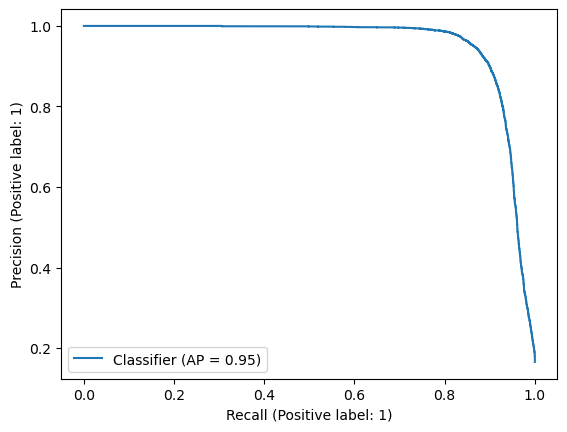

In [30]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_true,y_pred)

In [93]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv3/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv3/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/2701866335.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


In [94]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

In [95]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [96]:
def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'

In [97]:
tiled_test

,file_name,humans
0,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...,1
1,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r...,1
2,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c...,1
3,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d...,1
4,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...,1
...,...,...
11210,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11211,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11212,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11213,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0


In [98]:
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

In [112]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 

In [113]:
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

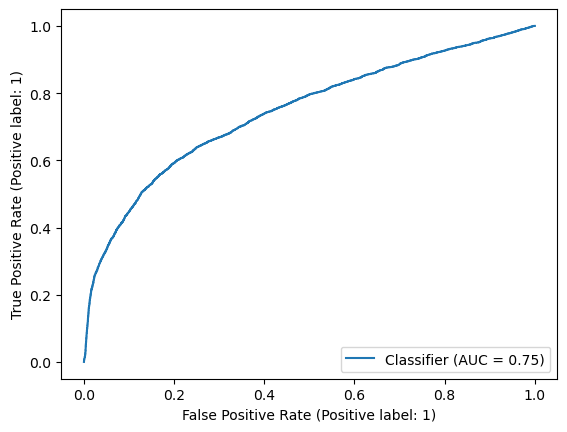

In [114]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [115]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[8372 2843]
 [1614 2874]]
recall 0.6403743315508021
precision 0.5027112121742172


**model2**

In [147]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

model2 = tf.keras.models.load_model(result_root+'19112022-1728-ResNet+tile+augmentation_10epochs_afo')

def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model2(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'
    
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 
tiled_test.to_csv(result_root+'19112022-1728-ResNet+tile+augmentation_10epochs_afo/test_prediction.csv')
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/1000422756.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


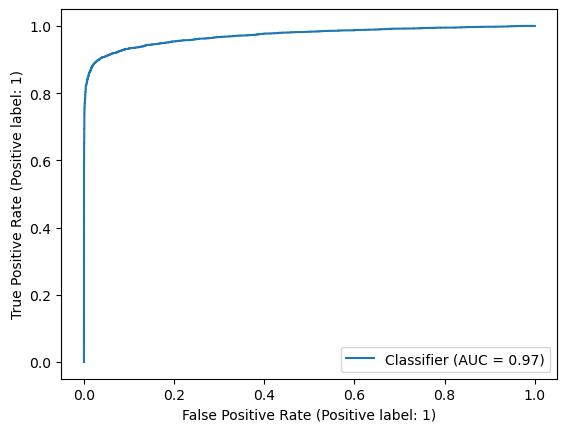

In [118]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [119]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[11076   139]
 [  620  3868]]
recall 0.8618538324420677
precision 0.9653107062640379


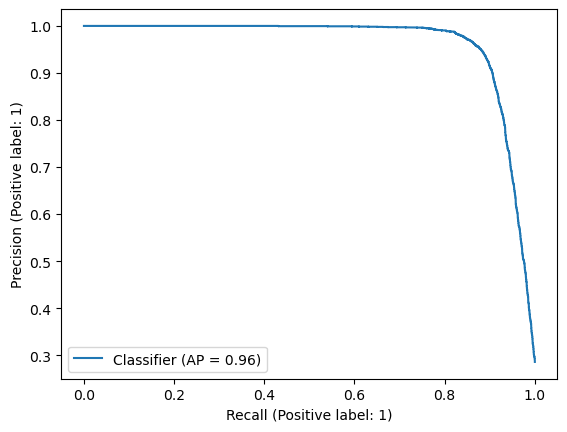

In [148]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_true,y_pred)

**model3**


In [128]:
df_true = pd.DataFrame(columns = ['file_name','humans'])
df_false = pd.DataFrame(columns = ['file_name','humans'])

df_true['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/*.jpg')
df_true.humans = 1

df_false['file_name'] = glob.glob(r'/Users/krish/ljmu/1.data/afo/tiledv2/test/false/*.jpg')
df_false.humans = 0

tiled_test = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_39050/2701866335.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tiled_test = df_true.append(df_false)


In [129]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x: str(x))

In [130]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [131]:
def predicter(file_path):
    
    #print(file_path)
    im = Image.open(file_path)
    test_input = np.array(im, dtype=np.uint8)
    if len(test_input.shape) == 3:
        test_input = resize_and_rescale(test_input)
        out = model3(tf.reshape(test_input,(1,224,224,3)))

        return np.array(out)[0][0] 
    else:
        return 'out_of_shape'

In [132]:
tiled_test

,file_name,humans
0,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...,1
1,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/r...,1
2,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/c...,1
3,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/d...,1
4,/Users/krish/ljmu/1.data/afo/tiledv2/test/ts/a...,1
...,...,...
11210,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11211,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11212,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0
11213,/Users/krish/ljmu/1.data/afo/tiledv2/test/fals...,0


In [133]:
tiled_test['prediction'] = tiled_test.file_name.apply(predicter)

In [134]:
tiled_test['humans'] = tiled_test.humans.apply(lambda x:int(x)) 

In [135]:
y_true = tiled_test.iloc[:]['humans'].values
y_pred = tiled_test.iloc[:]['prediction'].values

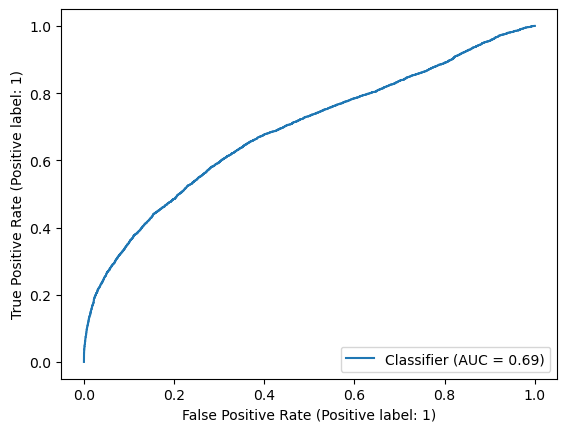

In [136]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_true, y_pred)

In [137]:
from sklearn.metrics import confusion_matrix
print('confusion',confusion_matrix(y_true,y_pred.round()))

from sklearn.metrics import recall_score
print('recall',recall_score(y_true,y_pred.round()))

from sklearn.metrics import precision_score
print('precision',precision_score(y_true,y_pred.round()))

confusion [[3472 7743]
 [ 764 3724]]
recall 0.8297682709447415
precision 0.32475800122089477


In [140]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_true,y_pred)

(array([0.28580526, 0.28582346, 0.28584167, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.45632799e-04, 2.22816399e-04, 0.00000000e+00]),
 array([6.9604104e-04, 1.6842517e-03, 1.7123807e-03, ..., 9.9910921e-01,
        9.9926418e-01, 9.9952912e-01], dtype=float32))

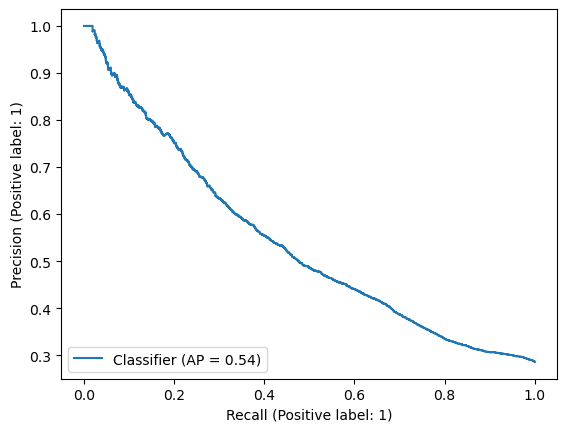

In [145]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_true,y_pred)

In [ ]:
# https://stats.stackexchange.com/questions/360017/when-is-an-auc-score-misleadingly-high
When to Use ROC vs. Precision-Recall Curves?
Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=ROC%20curves%20are%20appropriate%20when,are%20appropriate%20for%20imbalanced%20datasets.

In [6]:
import sys  
sys.path.insert(0, r'/Users/krish/ljmu/2.code')

import test_modular as th

In [8]:
th.tester()

hi da
